In [33]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from vaegan_fc import *
#from vaegan_conv import *
from vaegan import VAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
tf.reset_default_graph()

In [8]:
# Train
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = VAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 5e-4, num_epochs = 5, load=False, lr_decay=1.,
          checkpoint_name='test'
)

In [36]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = VAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-3, num_epochs = 5, load=True, #lr_decay=0.95, lr_decay_freq=1000,
               load_file = 'checkpoints/vaegan_fc_checkpoint-10'
)

In [9]:
model.train()

Epoch 1 loss: 218.655810103 (time: 14.5874669552 s)
Epoch 2 loss: 181.804398831 (time: 15.5325801373 s)
Epoch 3 loss: 158.883076699 (time: 17.2244479656 s)
Epoch 4 loss: 147.88271526 (time: 14.6784920692 s)
Epoch 5 loss: 140.190526983 (time: 14.4721708298 s)
1.27494684855 min


In [32]:
log = model.log
log = np.array(log).T
plt.plot(log[0,], log[1,])
plt.title('Loss')
plt.show()
plt.plot(log[0,], log[2,])
plt.title('Learning rate')
plt.show()

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [37]:
generated_images = model.generate()

In [38]:
x = mnist.test.images[xrange(100)]
x_dis_real = sess.run(model.dis_real, feed_dict={model.x:x})
#print dis_real.T

0.572166


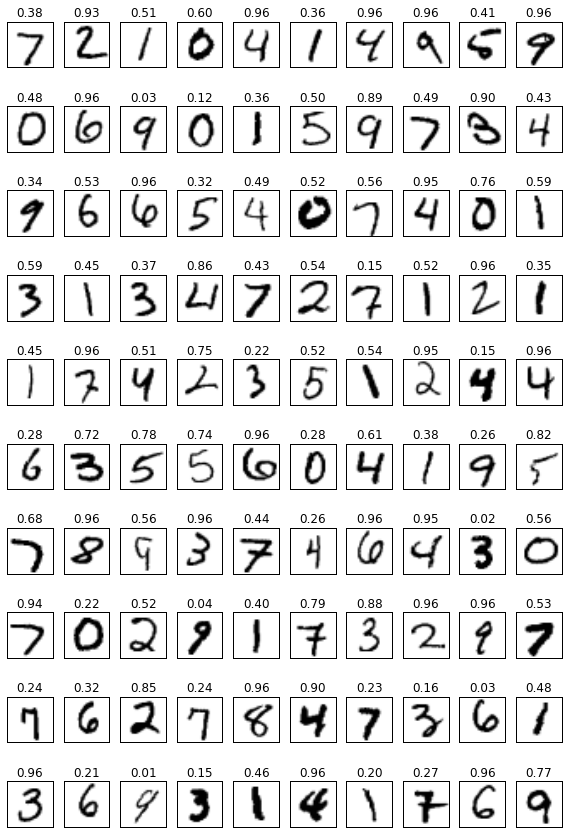

In [39]:
num_examples=10
print np.mean(x_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(x[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(x_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/SSL_generate_600')
plt.show()

In [40]:
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})
#print gen_dis_real.T

0.122789


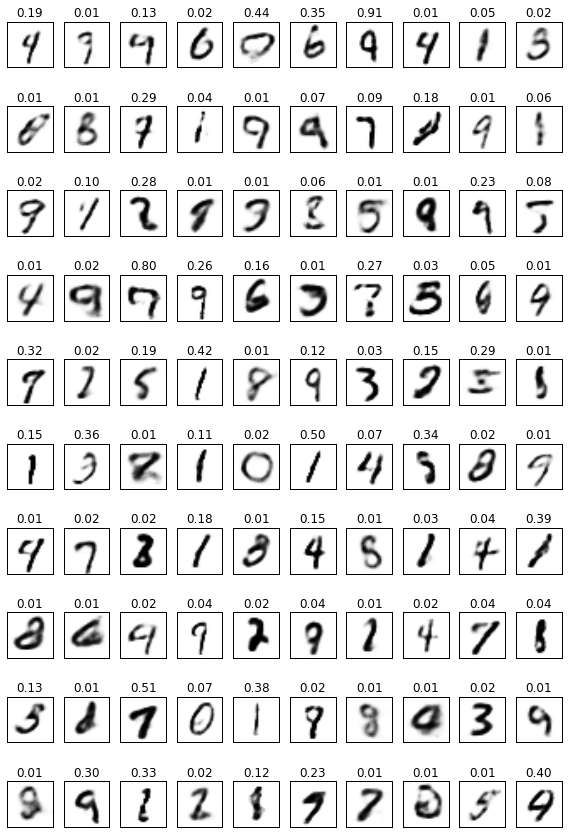

In [41]:
num_examples=10
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/VAEGAN_gen_fc')
plt.show()

In [42]:
rando = np.random.randn(100, 28*28)
rando_dis_real = sess.run(model.dis_real, feed_dict={model.x:rando})
print rando_dis_real.T

[[  6.51165470e-02   9.61090982e-01   3.69617306e-02   3.45478356e-02
    8.83057594e-01   3.57991494e-02   9.66279328e-01   3.02124489e-02
    9.35891211e-01   9.66688633e-01   1.52531326e-01   6.40842915e-02
    1.21027254e-03   3.06533221e-02   2.45582052e-02   9.57120299e-01
    3.77692655e-02   9.61770356e-01   9.65367794e-01   3.67128477e-02
    3.36969234e-02   3.60431150e-02   3.85582000e-02   9.45151806e-01
    9.59651589e-01   9.99244094e-01   7.20940530e-02   9.67441082e-01
    9.60489392e-01   1.63066462e-02   9.98620033e-01   7.22485632e-02
    9.66345787e-01   9.62113202e-01   9.69191551e-01   6.91862404e-02
    2.54903913e-01   9.51798558e-01   3.60244736e-02   9.87266481e-01
    9.68936920e-01   9.32811439e-01   9.58518088e-01   9.65197504e-01
    9.99961853e-01   9.65714335e-01   8.64705667e-02   9.66744602e-01
    4.02494892e-02   9.68242705e-01   1.71303127e-09   4.27296758e-02
    9.67806935e-01   2.49924907e-03   9.63541090e-01   9.85208433e-03
    3.28934948e-05  